In [7]:
!install.packages('prophet')

/bin/bash: -c: line 0: syntax error near unexpected token `'prophet''
/bin/bash: -c: line 0: `install.packages('prophet')'


In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
!pip install fbprophet

In [ ]:
!pip install chart_studio

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime as dt
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")

In [18]:
data=pd.read_csv("wiki_machine_learning.csv",sep=" ")
data.head(10)

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
76,2015-01-06,2327,en,Machine_learning,8708,201501,Machine_learning
75,2015-01-07,2469,en,Machine_learning,8708,201501,Machine_learning
74,2015-01-08,2349,en,Machine_learning,8708,201501,Machine_learning
73,2015-01-09,2279,en,Machine_learning,8708,201501,Machine_learning
63,2015-01-10,1600,en,Machine_learning,8708,201501,Machine_learning


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


In [20]:
data["date"]=pd.to_datetime( data["date"],infer_datetime_format=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   count   384 non-null    int64         
 2   lang    384 non-null    object        
 3   page    384 non-null    object        
 4   rank    384 non-null    int64         
 5   month   384 non-null    int64         
 6   title   384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB


In [23]:
predictions = 30
ph_data=pd.DataFrame()
ph_data["ds"]=data["date"]
ph_data["y"]=data["count"]
ph_data.tail(10)

,ds,y
379,2016-01-11,3083
378,2016-01-12,3319
377,2016-01-13,3145
384,2016-01-14,3164
383,2016-01-15,2743
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


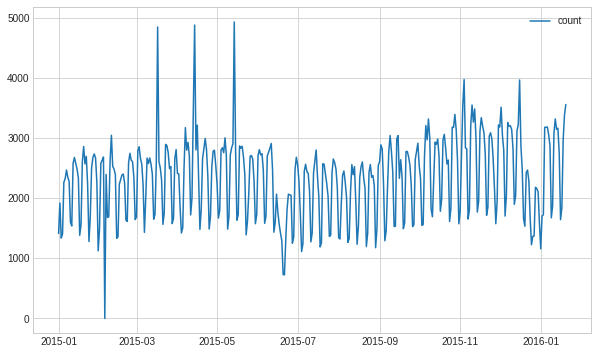

In [24]:
plt.figure(figsize=(10,6))
plt.plot(ph_data.set_index('ds'))
plt.legend(['count'])

In [25]:
model=Prophet(interval_width=0.95)
model.fit(ph_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future_prices = model.make_future_dataframe(periods=30,freq="D")
future_prices=model.predict(future_prices)
future_prices[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
384,2016-01-21,2917.360528,2164.222388,3698.519009
385,2016-01-22,2643.720123,1910.592713,3441.404542
386,2016-01-23,1811.582051,1111.662416,2578.361159
387,2016-01-24,1952.760717,1169.055785,2707.348950
388,2016-01-25,2968.270684,2219.105238,3732.742032
389,2016-01-26,3207.564456,2476.207458,3980.453225
390,2016-01-27,3100.774179,2308.968024,3848.490799
391,2016-01-28,2933.597190,2236.168248,3695.414135
392,2016-01-29,2659.956785,1929.391130,3431.072076
393,2016-01-30,1827.818712,1003.980008,2541.827785
